# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 한글 폰트 적용

from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
standard = pd.DataFrame({'자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [4]:
standard

,자치구
0,종로구
1,중구
2,용산구
3,성동구
4,광진구
5,동대문구
6,중랑구
7,성북구
8,강북구
9,도봉구


In [5]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [6]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [7]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [8]:
df=df.set_index('자치구')

In [9]:
df.head()

,계,남자,여자,65세이상고령자,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합)
자치구,,,,,,,,,,,,,,,,,,,,,
종로구,153684,74018,79666,28064,215,215,1548,5912,618,646,...,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.660701,19571837.56
중구,131450,63869,67581,24742,460,470,3176,12828,600,666,...,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.932366,19899691.04
용산구,236518,114571,121947,39461,832,1046,1714,5974,910,932,...,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,37.373125,14894087.30
성동구,291609,141662,149947,46896,2400,5054,1912,5570,2144,2322,...,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,43.141640,17635698.46
광진구,353110,169525,183585,52604,2238,3488,1926,5722,1936,1970,...,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   계                     25 non-null     int64  
 1   남자                    25 non-null     int64  
 2   여자                    25 non-null     int64  
 3   65세이상고령자              25 non-null     int64  
 4   택시운송업 사업체수            25 non-null     int64  
 5   택시운송업 종사자수            25 non-null     int64  
 6   한식 일반 음식점업 사업체수       25 non-null     int64  
 7   한식 일반 음식점업 종사자수       25 non-null     int64  
 8   용달 화물자동차 운송업 사업체수     25 non-null     int64  
 9   용달 화물자동차 운송업 종사자수     25 non-null     int64  
 10  부동산 중개 및 대리업 사업체수     25 non-null     int64  
 11  부동산 중개 및 대리업 종사자수     25 non-null     int64  
 12  두발미용업 사업체수            25 non-null     int64  
 13  두발미용업 종사자수            25 non-null     int64  
 14  커피전문점 사업체수            25 non-null     int64  
 15  커피전문점 종사자수            25 no

Text(0.5, 1.0, '상관관계')

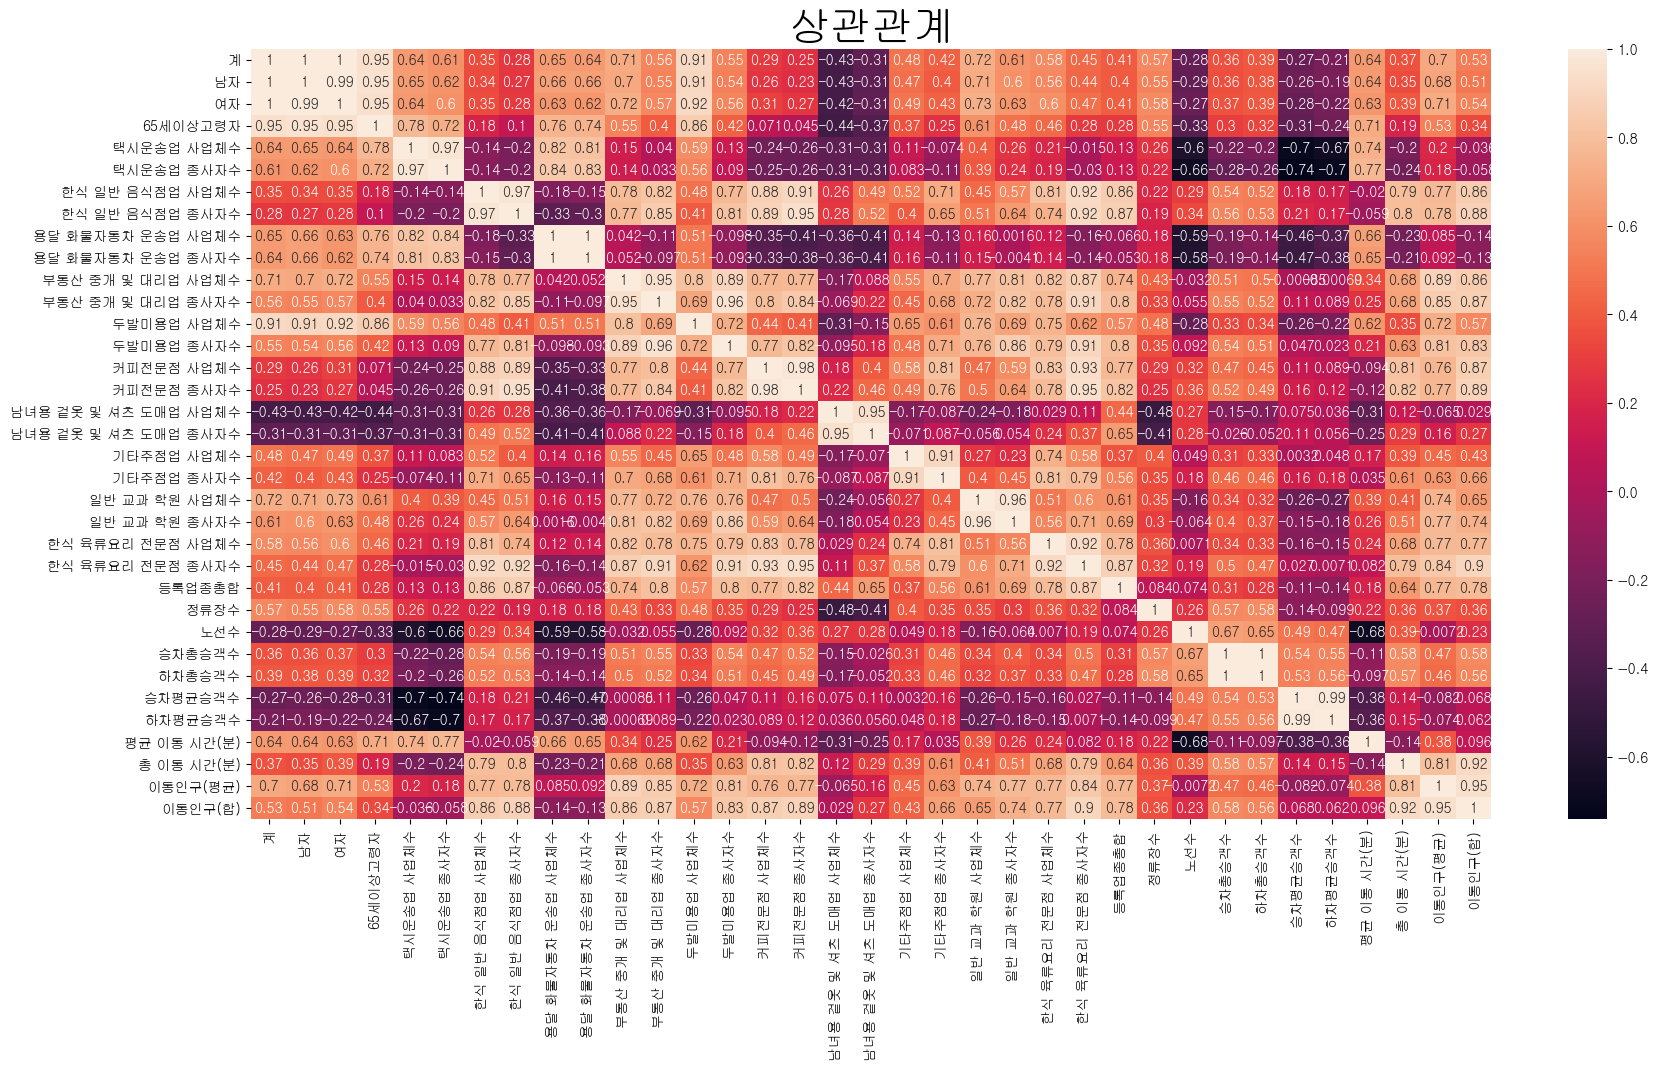

In [11]:
cor=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)

# 가설 : 65세이상고령자분들의 주교통수단은 버스라고 생각하기에 고령자수에 비해 정류장수가 적은 구는 버스 정류장이 필요하다고 판단.

### 따라서, 65세이상고령자가 많은 자치구일수록 정류장 수가 많을 것이다.

In [12]:
import scipy.stats as stats

In [13]:
# 상관계수와 p-value 값을 확인한다.
# p-value < 0.05 유의미함을 확인한다.

stats.pearsonr(df['65세이상고령자'],df['정류장수'])

PearsonRResult(statistic=0.5544251917556621, pvalue=0.004027134889597207)

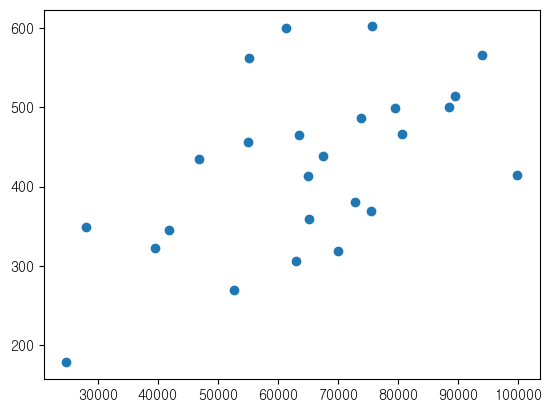

In [14]:
# 데이터를 scatter로 확인한다.
# 65세이상고령자수와 정류장수가 양의 상관관계를 보임을 확인한다.

plt.scatter('65세이상고령자','정류장수',data=df)

In [15]:
# 65세이상고령자와 정류장수의 관계에 적합한 회귀식을 구하기 위해서
# 관측된 값으로부터 회귀계수 값을 추정한다.
# sklearn에서 제공하는 linear_model을 import 한다.
# lr 변수를 생성한다.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
# x는 65세이상고령자, y는 정류장수로 정한다.

x= df['65세이상고령자'].values
y= df['정류장수'].values

In [17]:
# 회귀분석을 위해 2차원 배열형태로 바꿔준다.

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [18]:
# 회귀분석

lr.fit(x, y)

LinearRegression()

In [19]:
# 회귀계수가 0.003, 225.460로 결과가 나왔고,
# 두 변수의 관계를 회귀식으로 표현하면 정류장수 = 0.003 * 65세이상고령자수 + 225.460이고, 
# 이는 정류장수 수치가 1증가할 때마다 65세이상고령자수가 0.003만큼 증가한다.

print(lr.coef_[0])
print(lr.intercept_)

[0.0030562]
[225.46065979]


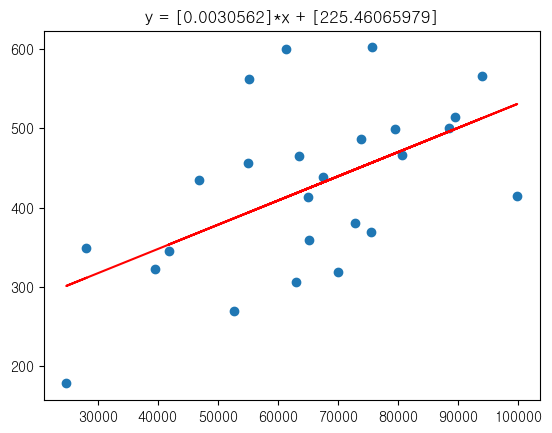

In [20]:
# scatter로 회귀식 그리기

import matplotlib.pyplot as plt
y2 = lr.coef_[0]*x + lr.intercept_
plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

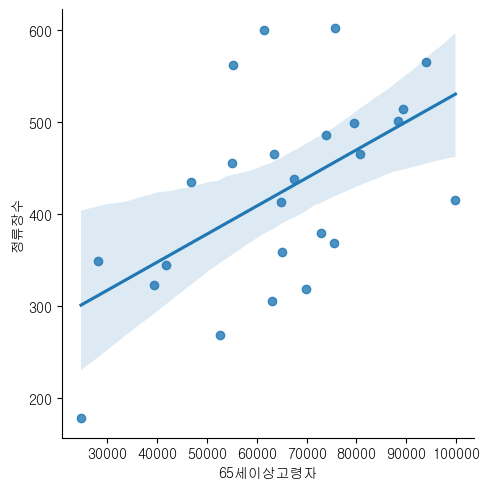

In [21]:
#seaborn 으로 회귀선 그리기

plt = sns.lmplot(x='65세이상고령자',y='정류장수', data=df)

In [22]:
# 회귀모형의 검정 및 적합도 파악
# A. F-statistic
# 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악

# B. P-Value
# 각 변수가 종속변수에 미치는 영향이 유의한지 파악

# C. 수정된 R제곱
# 회귀직선에 의하여 설명되는 변동이 총변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄
# 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인

import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     10.21
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00403
Time:                        13:53:10   Log-Likelihood:                -147.02
No. Observations:                  25   AIC:                             298.0
Df Residuals:                      23   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.4607     64.896      3.474      0.002      91.212     359.709
x1             0.0031      0.001      3.195      0.004       0.001       0.005
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.756
Skew:                           0.356   Prob(JB):                        0.685
Kurtosis:                       2.532   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A. F-statistic의 p-value 값은 Prob(F-statistic)으로 표현되는데, 
이는 0.00403로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있습니다.
 
B. 중간쯤에 보면 coef와 변수 x1의 p-value 값이 나와있습니다. 
여기서 x1은 65세이상 고령자수 이고 이 변수의 p-value가 0.004로 표기 되어 있기에 0.05보다 작으므로 
target을 설명하는데 유의하다고 판단할 수 있습니다.
 
C. 제일 위 부분에 R-squared와 Adj. R-squared가 표기되어 있는데, 
값이 0.307정도로 이는 30%만큼의 설명력을 가진다고 판단할 수 있습니다. 
참고로, 0에 가까울 수록 예측값을 믿을 수 없고 1에 가까울 수록 믿을 수 있다고 보면 됩니다.

In [24]:
# 실제 정류장수와 예측되는 정류장수의 차이를 비교한다.

difference = df['정류장수']-(lr.coef_[0] * df['65세이상고령자'] + lr.intercept_)

In [25]:
difference

자치구
종로구      37.770232
중구     -123.077082
용산구     -23.061243
성동구      66.215934
광진구    -117.228838
동대문구   -111.887981
중랑구     -68.107655
성북구     145.127173
강북구     -10.994262
도봉구     -65.486309
노원구      15.235883
은평구       5.316529
서대문구     62.411840
마포구     167.935074
양천구    -120.250796
강서구      53.489110
구로구      34.796418
금천구      -8.267755
영등포구     45.327201
동작구       6.337740
관악구      -6.052957
서초구     186.876630
강남구      30.342478
송파구    -115.634138
강동구     -87.133228
dtype: float64

In [26]:
differences = {'정류장수 차이': difference}
df_diff = pd.DataFrame(differences)
df_diff = df_diff.sort_values('정류장수 차이')
df_diff = df_diff.reset_index()
df_diff

,자치구,정류장수 차이
0,중구,-123.077082
1,양천구,-120.250796
2,광진구,-117.228838
3,송파구,-115.634138
4,동대문구,-111.887981
5,강동구,-87.133228
6,중랑구,-68.107655
7,도봉구,-65.486309
8,용산구,-23.061243
9,강북구,-10.994262


In [27]:
# 중구가 회귀식으로 구한 정류장수에 비해 실제 정류장수가 훨씬 적으므로, 중구에 추가적인 정류장이 필요하다.

plt.figure(figsize=(20,10))
plt.title('실제 정류장수 - 예측 정류장수')
plt.bar(df_diff['자치구'],df_diff['정류장수 차이'])
plt.xlabel('구')
plt.ylabel('정류장수 차이')

plt.show()

TypeError: 'Figure' object is not callable

# 가설 : 승하차총승객수가 많은 자치구일수록 정류장수가 많을 것이다.

In [28]:
# 상관계수와 p-value 값을 확인한다.
# p-value < 0.05 유의미함을 확인한다.

df['승하차평균승객수'] = df['승차평균승객수']+df['하차평균승객수']
df['승하차평균승객비율'] = df['승하차평균승객수']/df['계']
stats.pearsonr(df['승하차평균승객비율'],df['정류장수'])

PearsonRResult(statistic=-0.5901987601440953, pvalue=0.0018986453942341922)

In [29]:
# 데이터를 scatter로 확인한다.
# 승하차평균승객비율과 정류장수가 음의 상관관계를 보임을 확인한다.

plt.scatter('승하차평균승객비율','정류장수',data=df)

AttributeError: 'FacetGrid' object has no attribute 'scatter'

In [30]:
# 승하차평균승객비율과 정류장수의 관계에 적합한 회귀식을 구하기 위해서
# 관측된 값으로부터 회귀계수 값을 추정한다.
# lr 변수를 생성한다.

lr = LinearRegression()

In [31]:
# x는 승하차평균승객비율, y는 정류장수로 정한다.

x= df['승하차평균승객비율'].values
y= df['정류장수'].values

In [32]:
# 회귀분석을 위해 2차원 배열형태로 바꿔준다.

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [33]:
# 회귀분석

lr.fit(x, y)

LinearRegression()

In [34]:
# 회귀계수가 -168613.24794964, 540.44403894로 결과가 나왔고,
# 두 변수의 관계를 회귀식으로 표현하면 정류장수 = -168613.24794964 * 승하차평균승객비율 + 540.44403894이고, 
# 이는 정류장수 수치가 1증가할 때마다 승하차평균승객비율이 -168613.24794964만큼 감소한다.

print(lr.coef_[0])
print(lr.intercept_)

[-168613.24794964]
[540.44403894]


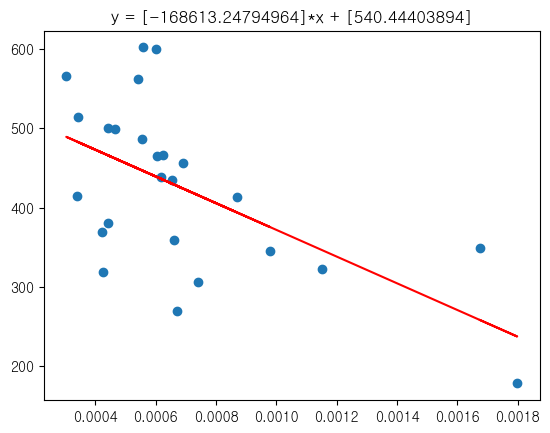

In [35]:
# scatter로 회귀식 그리기

import matplotlib.pyplot as plt
y2 = lr.coef_[0]*x + lr.intercept_
plt.scatter(x, y)
plt.plot(x, y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [36]:
# 회귀모형의 검정 및 적합도 파악
# A. F-statistic
# 도출된 회귀식이 회귀분석 모델 전체에 대해 통계적으로 의미가 있는지 파악

# B. P-Value
# 각 변수가 종속변수에 미치는 영향이 유의한지 파악

# C. 수정된 R제곱
# 회귀직선에 의하여 설명되는 변동이 총변동 중에서 차지하고 있는 상대적인 비율이 얼마인지 나타냄
# 즉, 회귀직선이 종속변수의 몇%를 설명할 수 있는지 확인

import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     12.29
Date:                Tue, 15 Nov 2022   Prob (F-statistic):            0.00190
Time:                        13:53:27   Log-Likelihood:                -146.26
No. Observations:                  25   AIC:                             296.5
Df Residuals:                      23   BIC:                             299.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        540.4440     37.400     14.450      0.000     463.075     617.813
x1         -1.686e+05   4.81e+04     -3.506      0.002   -2.68e+05   -6.91e+04
==============================================================================
Omnibus:                        0.131   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.352
Skew:                          -0.023   Prob(JB):                        0.839
Kurtosis:                       2.421   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A. F-statistic의 p-value 값은 Prob(F-statistic)으로 표현되는데, 
이는 0.00190로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다고 볼 수 있습니다.
 
B. 중간쯤에 보면 coef와 변수 x1의 p-value 값이 나와있습니다. 
여기서 x1은 승하차평균승객비율이고 이 변수의 p-value가 	0.002로 표기 되어 있기에 0.05보다 작으므로 
target을 설명하는데 유의하다고 판단할 수 있습니다.
 
C. 제일 위 부분에 R-squared와 Adj. R-squared가 표기되어 있는데, 
값이 0.348정도로 이는 35%만큼의 설명력을 가진다고 판단할 수 있습니다. 
참고로, 0에 가까울 수록 예측값을 믿을 수 없고 1에 가까울 수록 믿을 수 있다고 보면 됩니다.

In [38]:
# 실제 정류장수와 예측되는 정류장수의 차이를 비교한다.

difference = df['정류장수']-(lr.coef_[0] * df['승하차평균승객비율'] + lr.intercept_)

In [39]:
differences = {'정류장수 차이': difference}
df_diff = pd.DataFrame(differences)
df_diff = df_diff.sort_values('정류장수 차이')
df_diff = df_diff.reset_index()
df_diff

,자치구,정류장수 차이
0,광진구,-158.333738
1,양천구,-149.625082
2,동대문구,-109.854171
3,강동구,-100.286230
4,중랑구,-86.068237
5,도봉구,-69.751732
6,송파구,-67.975097
7,중구,-59.280582
8,금천구,-30.308606
9,용산구,-23.266894


In [ ]:
rank = df['정류장수 차이']
ranks = {'Rank':}

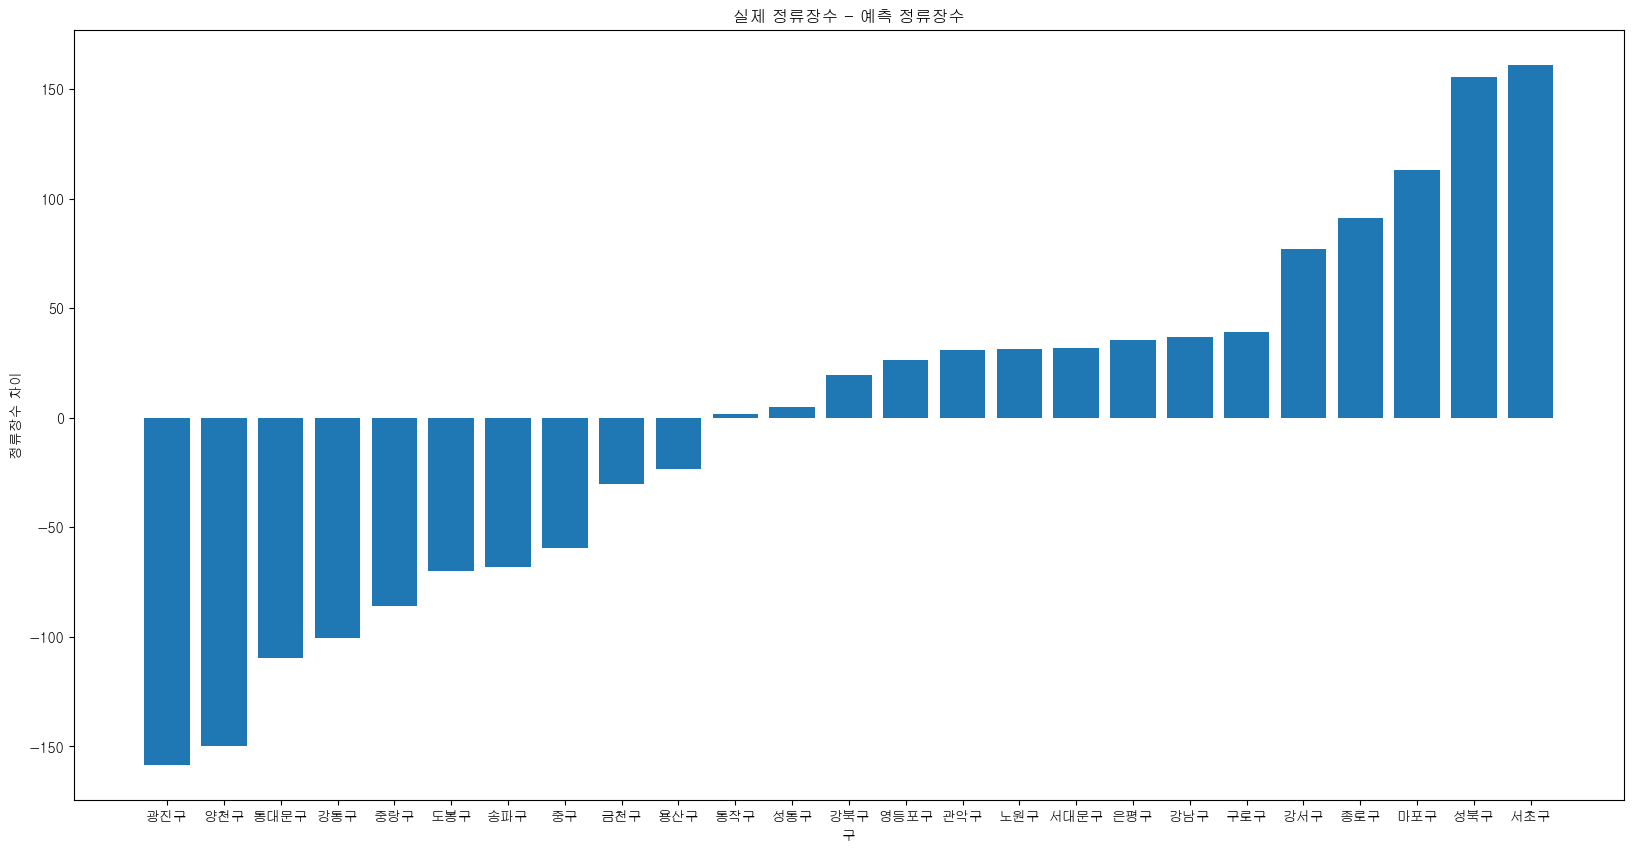

In [40]:
# 광진구가 회귀식으로 구한 정류장수에 비해 실제 정류장수가 훨씬 적다는 것을 확인할 수 있다.

plt.figure(figsize=(20,10))
plt.title('실제 정류장수 - 예측 정류장수')
plt.bar(df_diff['자치구'],df_diff['정류장수 차이'])
plt.xlabel('구')
plt.ylabel('정류장수 차이')

plt.show()

In [41]:
from scipy.stats import ranksums

In [ ]:
df_diff

In [42]:
ranksums(df_diff)

KeyError: 'y'

In [154]:
# 다중회귀분석

x1 = df.loc[:,['65세이상고령자','승하차평균승객비율']].values
y1 = df['정류장수'].values
y1 = y1.reshape(-1,1)

In [155]:
import statsmodels.api as sm
results = sm.OLS(y1, sm.add_constant(x1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     6.112
Date:                Mon, 07 Nov 2022   Prob (F-statistic):            0.00774
Time:                        23:06:30   Log-Likelihood:                -146.09
No. Observations:                  25   AIC:                             298.2
Df Residuals:                      22   BIC:                             301.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.0487    179.227      2.478      0.021      72.355     815.743
x1             0.0010      0.002      0.550      0.588      -0.003       0.005
x2         -1.239e+05   9.49e+04     -1.305      0.205   -3.21e+05    7.29e+04
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.397
Skew:                           0.093   Prob(JB):                        0.820
Kurtosis:                       2.411   Cond. No.                     3.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?